# Toward Casper
**C**HT **A**BSA **S**tatistical **p**rocessing **e**xplorative **r**eport

In [25]:
require(mgcv)
require(itsadug)
require(readr)
require(dplyr)
require(ggplot2)
require(latticeExtra)
require(showtext)
require(RColorBrewer)
showtext_auto()

Loading required package: latticeExtra

Loading required package: lattice


Attaching package: 'latticeExtra'


The following object is masked from 'package:ggplot2':

    layer




In [2]:
popt = function(w,h,r){
    options(repr.plot.width=w, repr.plot.height=h, repr.plot.res=r)
}

In [4]:
data = read_csv("../../data/casper/cadet_JanMay.csv")


-- Column specification ----------------------------------------------------------------------------------------------------------
cols(
  opid = col_character(),
  year = col_double(),
  woy = col_double(),
  ts = col_double(),
  source = col_character(),
  entity = col_character(),
  category = col_character(),
  attribute = col_character(),
  rating = col_double(),
  text = col_character()
)




In [5]:
names(data)

[1] "opid"      "year"      "woy"       "ts"        "source"    "entity"   
 [7] "category"  "attribute" "rating"    "text"

In [6]:
pol_data = data[(data$rating!=0) & (data$year==2021) & (substring(data$entity, 0, 1)!="無"),2:9]
pol_data$rating = (pol_data$rating+1)/2
pol_data$entity = factor(pol_data$entity)
pol_data$source = factor(pol_data$source)
pol_data$category = factor(pol_data$category)
nrow(pol_data)

[1] 13434

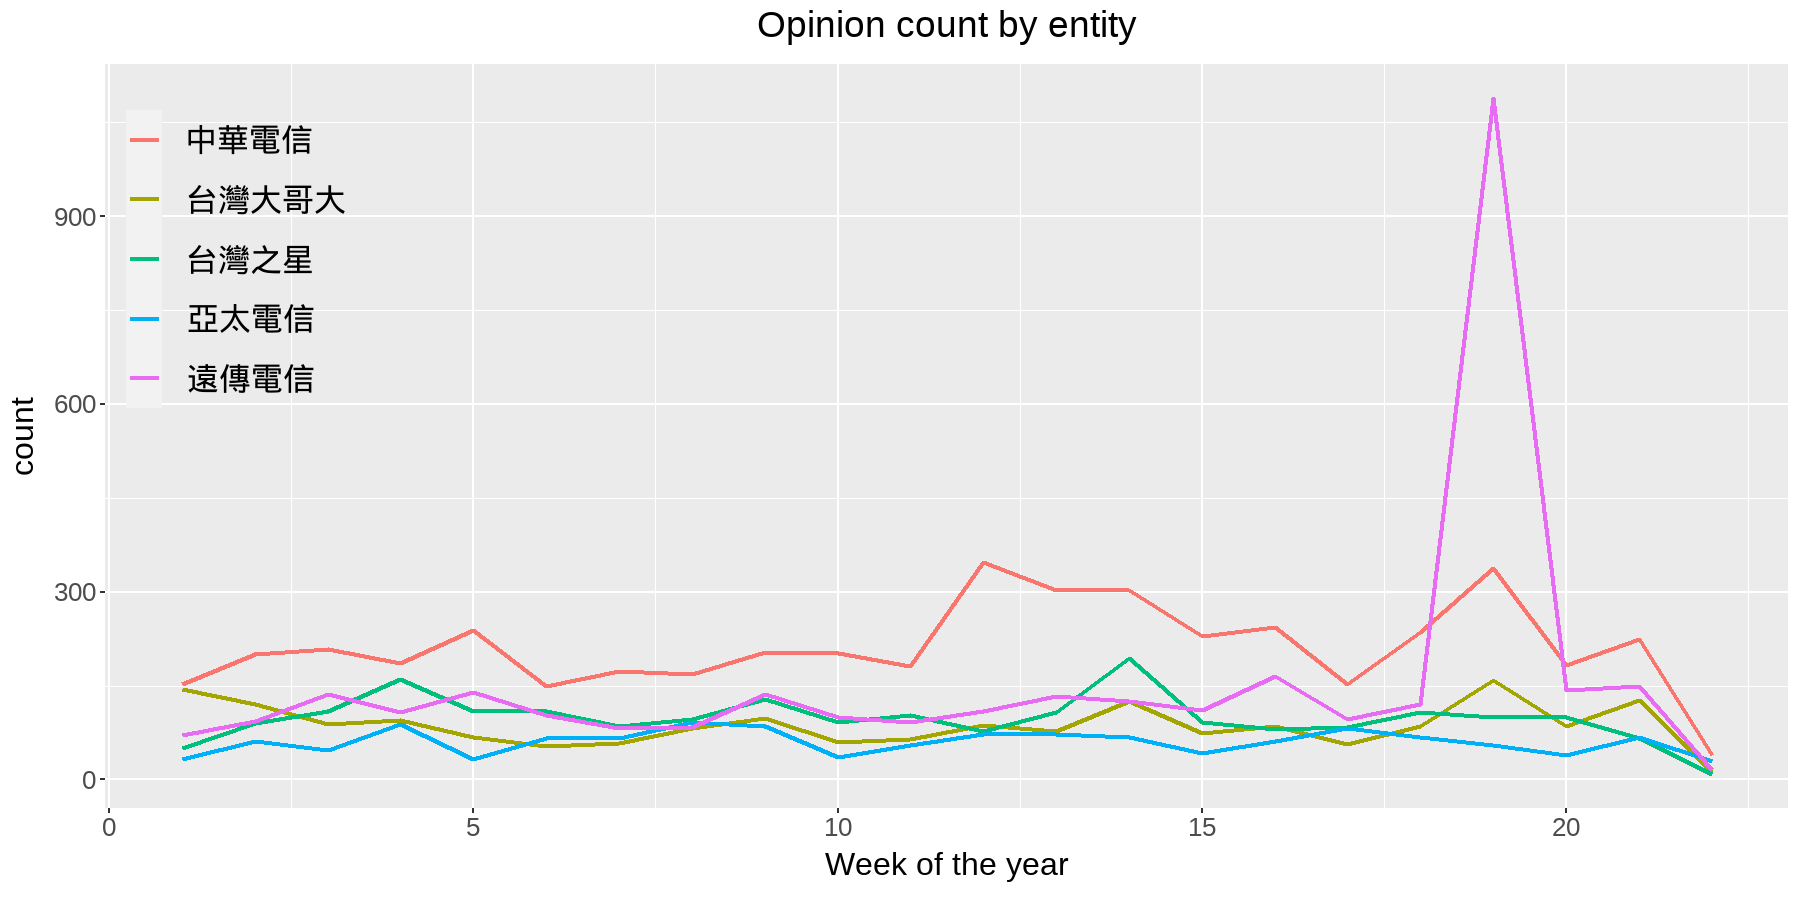

In [7]:
popt(12,6,150)
ggplot(pol_data, aes(x=woy, color=entity)) + 
geom_line(stat="count", lwd=1) + 
labs(title="Opinion count by entity", x="Week of the year", color="電信業者") + 
theme(plot.title=element_text(size=28, hjust=0.5),
      text = element_text(size=24),
      legend.text=element_text(size=24), legend.position=c(.0,1), 
      legend.title=element_blank(),
      legend.margin=margin(10,10,10,10), 
      legend.justification=c("left", "top"),
      legend.background=element_rect(fill="transparent"))

In [8]:
unique(pol_data$source)

[1] BabyHome 寶貝家庭親子網 Dcard                   facebook粉絲團         
 [4] Google Play App 評價    mobile01                Plurk搜尋              
 [7] Ptt                     伊莉討論區              SOGO論壇               
[10] ePrice比價王            iTunes App 評價         Line Today             
[13] PCDVD                   Sogi手機王              TWitter搜尋            
[16] 卡提諾王國              Youtube頻道             Android-台灣中文網     
[19] 巴哈姆特哈拉區          Meteor                  媽咪拜MamiBuy          
[22] facebook社團或個人      捷克論壇                鹿talk社               
[25] 信誼奇蜜親子網          嘰咕 Park               Luckydog               
[28] MyAV                   
28 Levels: Android-台灣中文網 BabyHome 寶貝家庭親子網 Dcard ... 嘰咕 Park

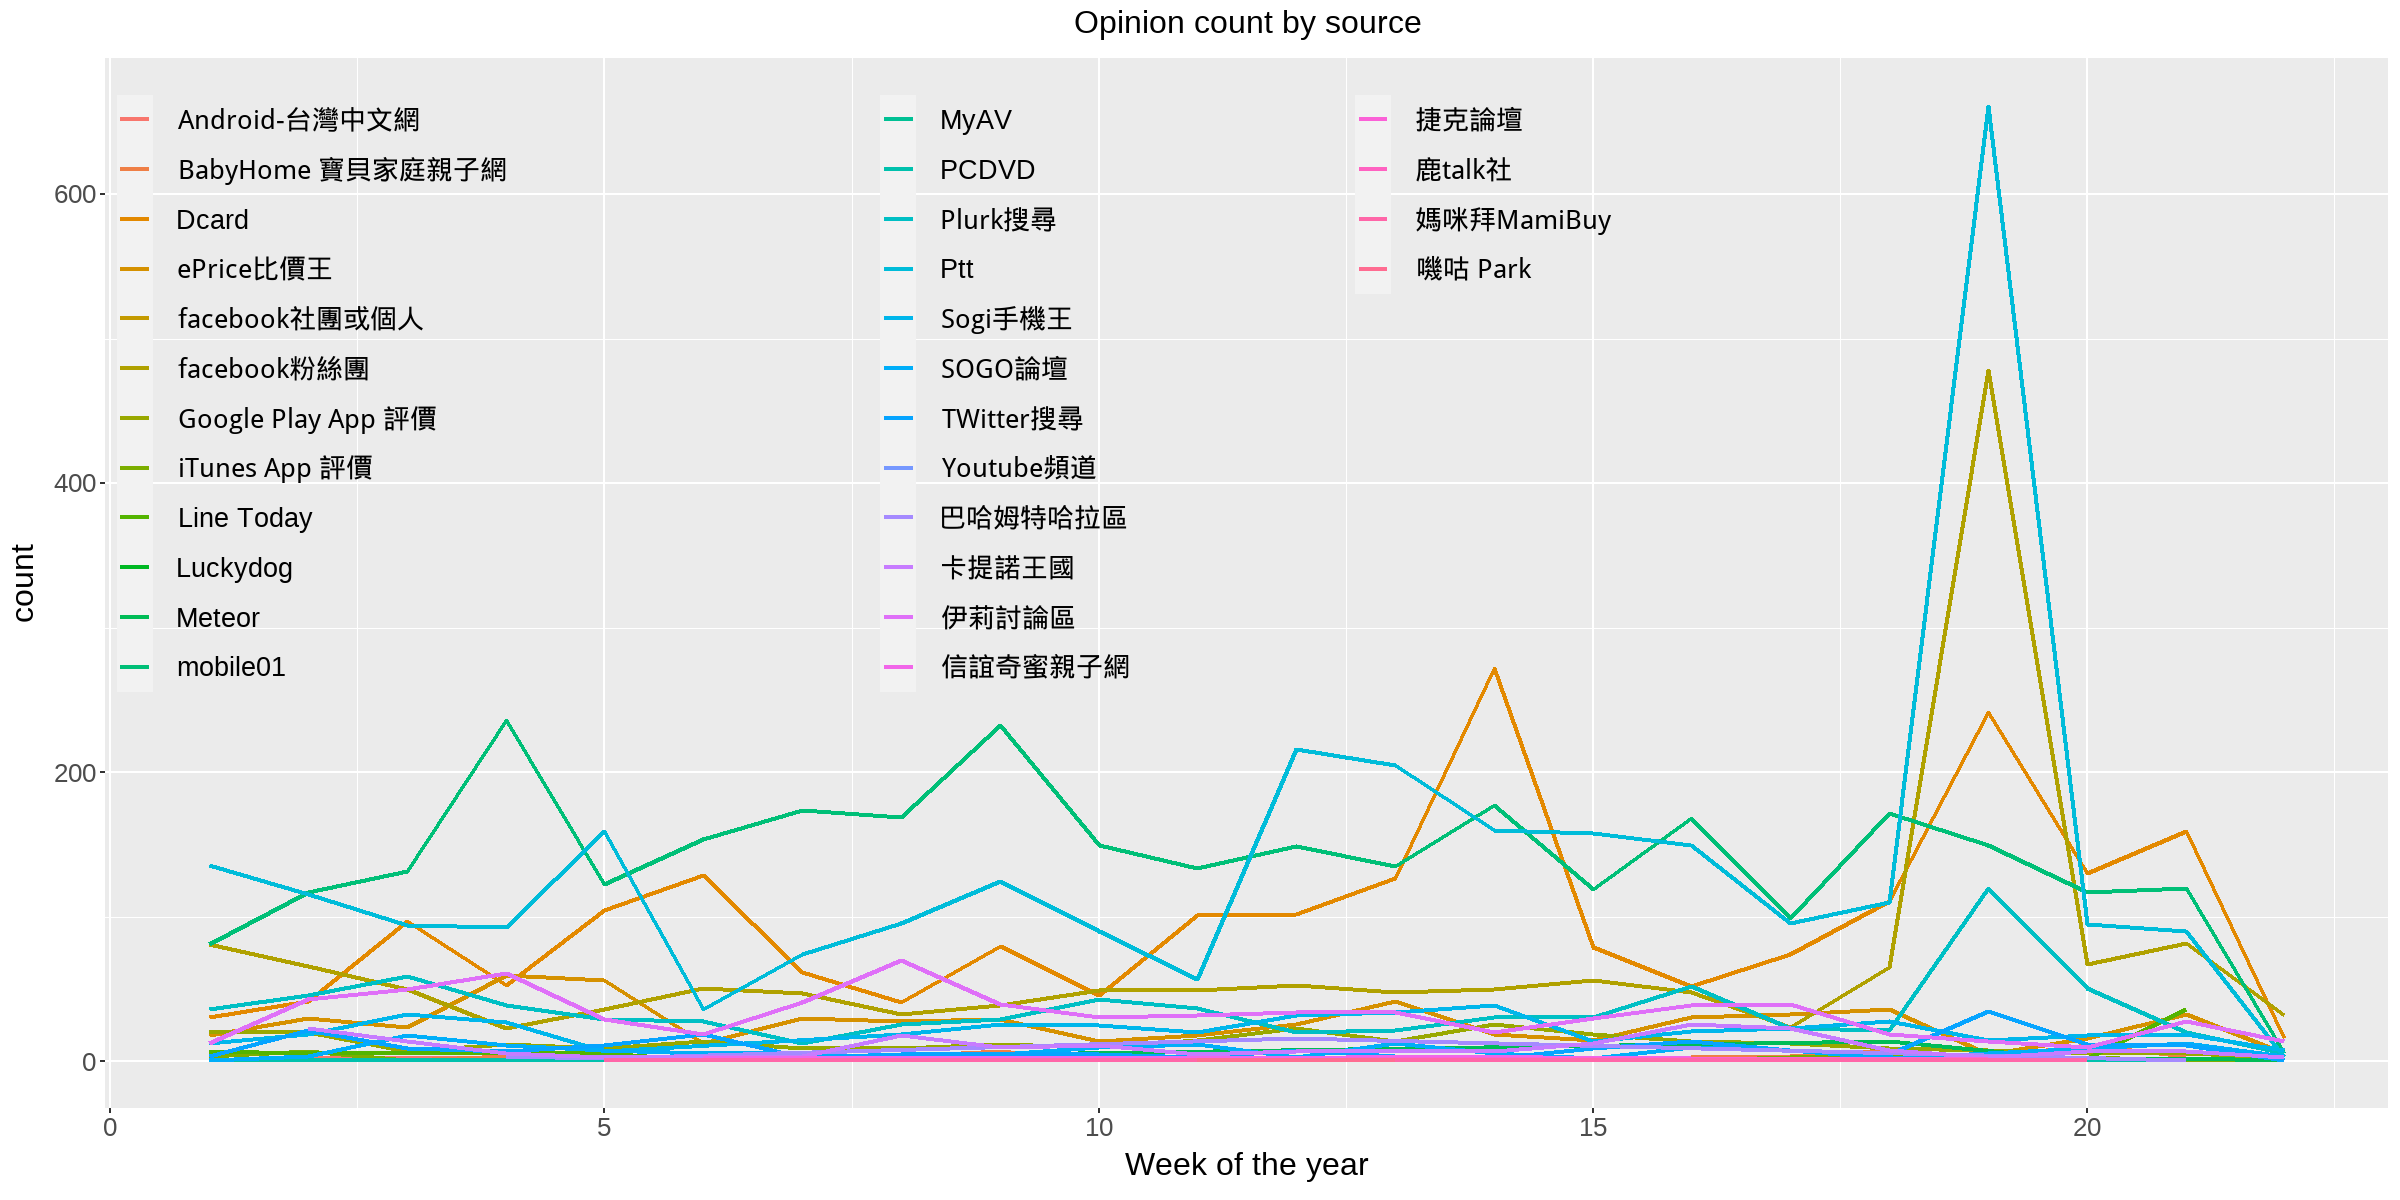

In [9]:
popt(16,8,150)
ggplot(pol_data, aes(x=woy, color=source)) + 
geom_line(stat="count", lwd=1) + 
labs(title="Opinion count by source", x="Week of the year") + 
scale_color_discrete(guide=guide_legend(nrow=12)) + 
theme(plot.title=element_text(size=24, hjust=0.5),
      text=element_text(size=24),
      legend.title=element_blank(),            
      legend.text=element_text(size=20), legend.position=c(.0,1),       
      legend.justification=c("left", "top"),
      legend.background=element_rect(fill="transparent"))

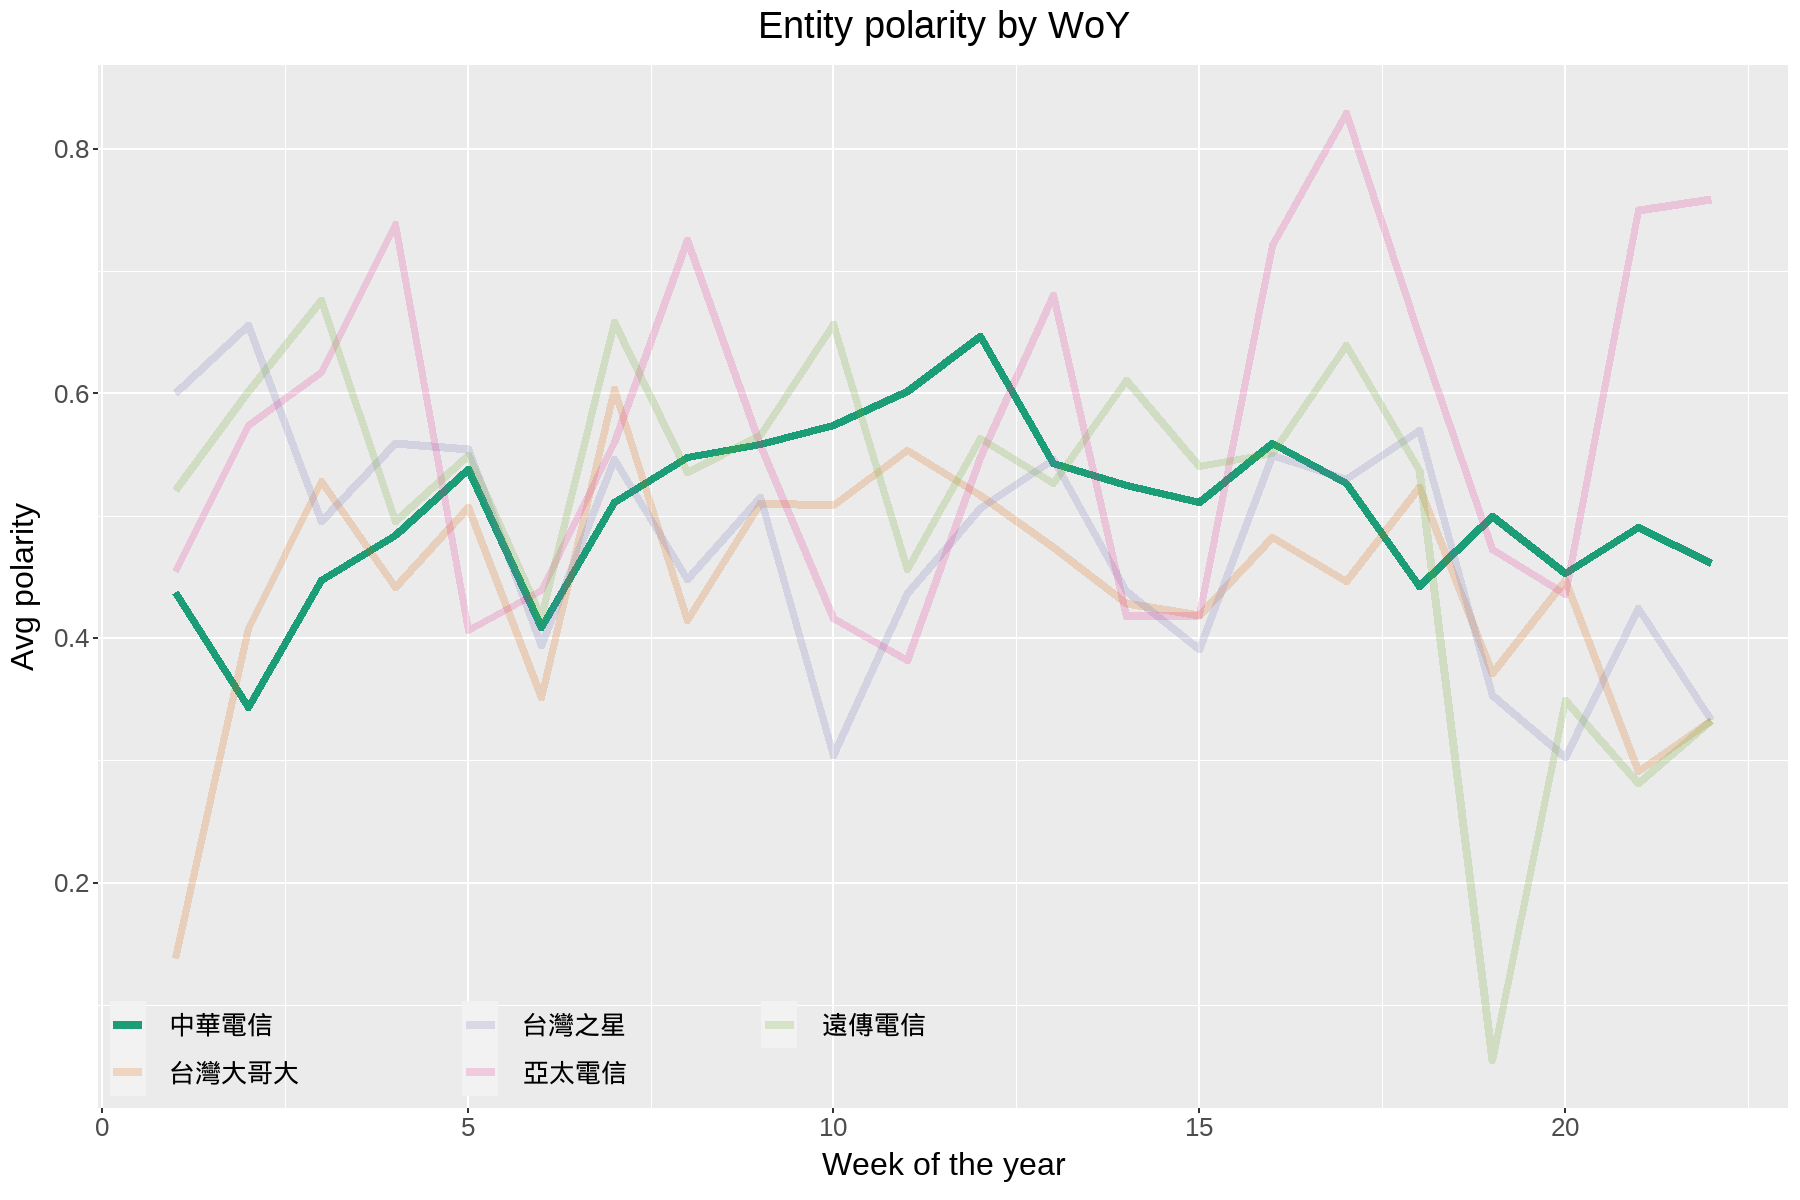

In [10]:
popt(12,8,150)
ent_pal = function() {
    function(n){
        avals = rep(0.2, n)
        avals[1] = 1
        return(alpha(brewer.pal(n, 'Dark2'), avals))
    }
}
ggplot(data = pol_data %>% 
               group_by(entity, woy) %>% 
               summarise(mean=mean(rating), .groups="drop"),
      aes(x=woy, y=mean, color=entity)) + 
geom_line(lwd=2) + 
labs(y="Avg polarity", x="Week of the year", title="Entity polarity by WoY") + 
scale_color_discrete(palette=ent_pal(), guide=guide_legend(nrow=2)) + 
theme(text=element_text(size=24),
    plot.title=element_text(hjust=0.5),
    legend.position=c(0, 0), 
    legend.justification=c("left", "bottom"),
    legend.background=element_rect(fill="transparent"),
    legend.title=element_blank())

In [11]:
cht_data = pol_data %>% filter(entity=="中華電信" & (category %in% c("通訊品質", "資費方案", "加值服務")))
cht_data$source = factor(cht_data$source)
cht_data$category = relevel(factor(cht_data$category), "通訊品質")

In [12]:
nrow(data)

[1] 104685

In [13]:
nrow(cht_data)

[1] 3333

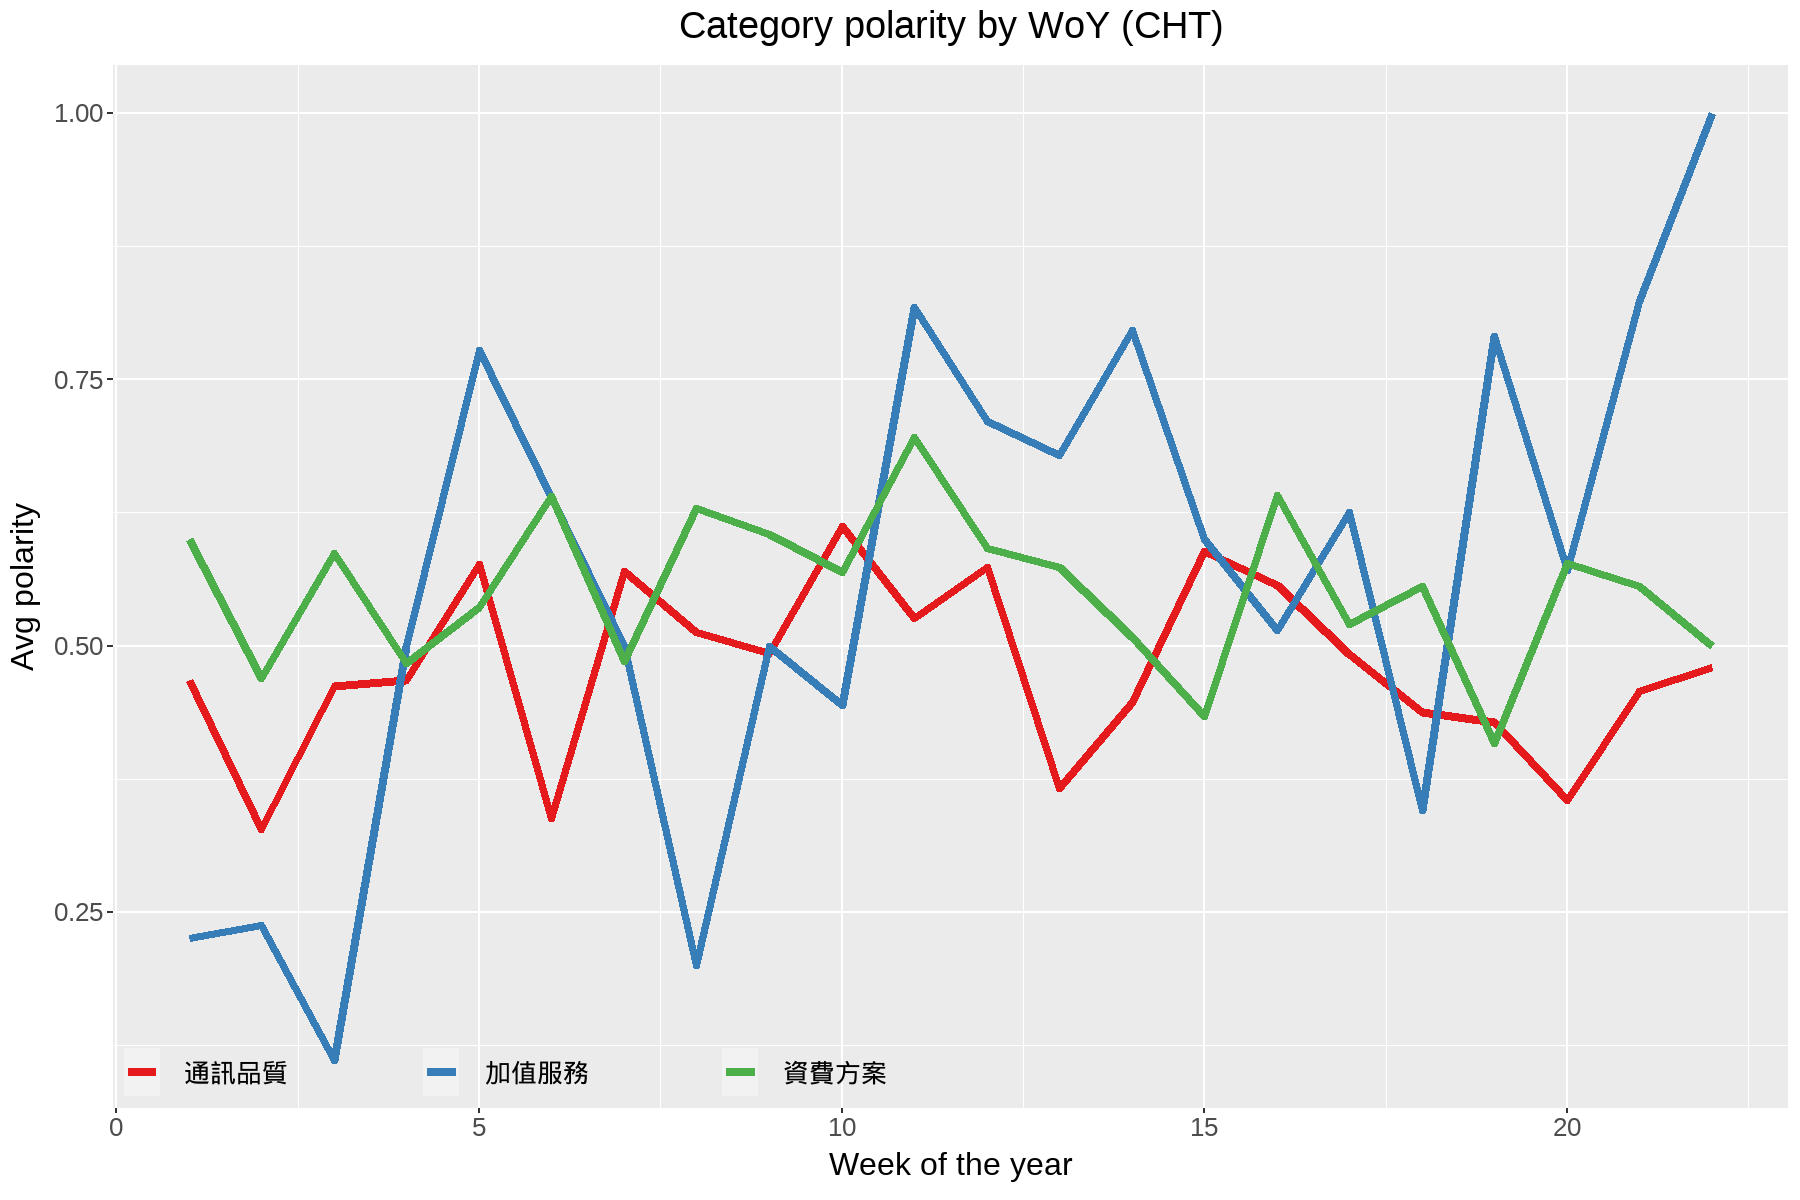

In [14]:
popt(12,8,150)
ggplot(data = cht_data %>% 
               group_by(category, woy) %>% 
               summarise(mean=mean(rating), .groups="drop"),
      aes(x=woy, y=mean, color=category)) + 
geom_line(lwd=2) + 
labs(y="Avg polarity", x="Week of the year", title="Category polarity by WoY (CHT)") + 
scale_color_brewer(palette="Set1", guide=guide_legend(nrow=1)) + 
theme(text=element_text(size=24),
    plot.title=element_text(hjust=0.5),
    legend.position=c(0, 0), 
    legend.justification=c("left", "bottom"),
    legend.background=element_rect(fill="transparent"),
    legend.title=element_blank())

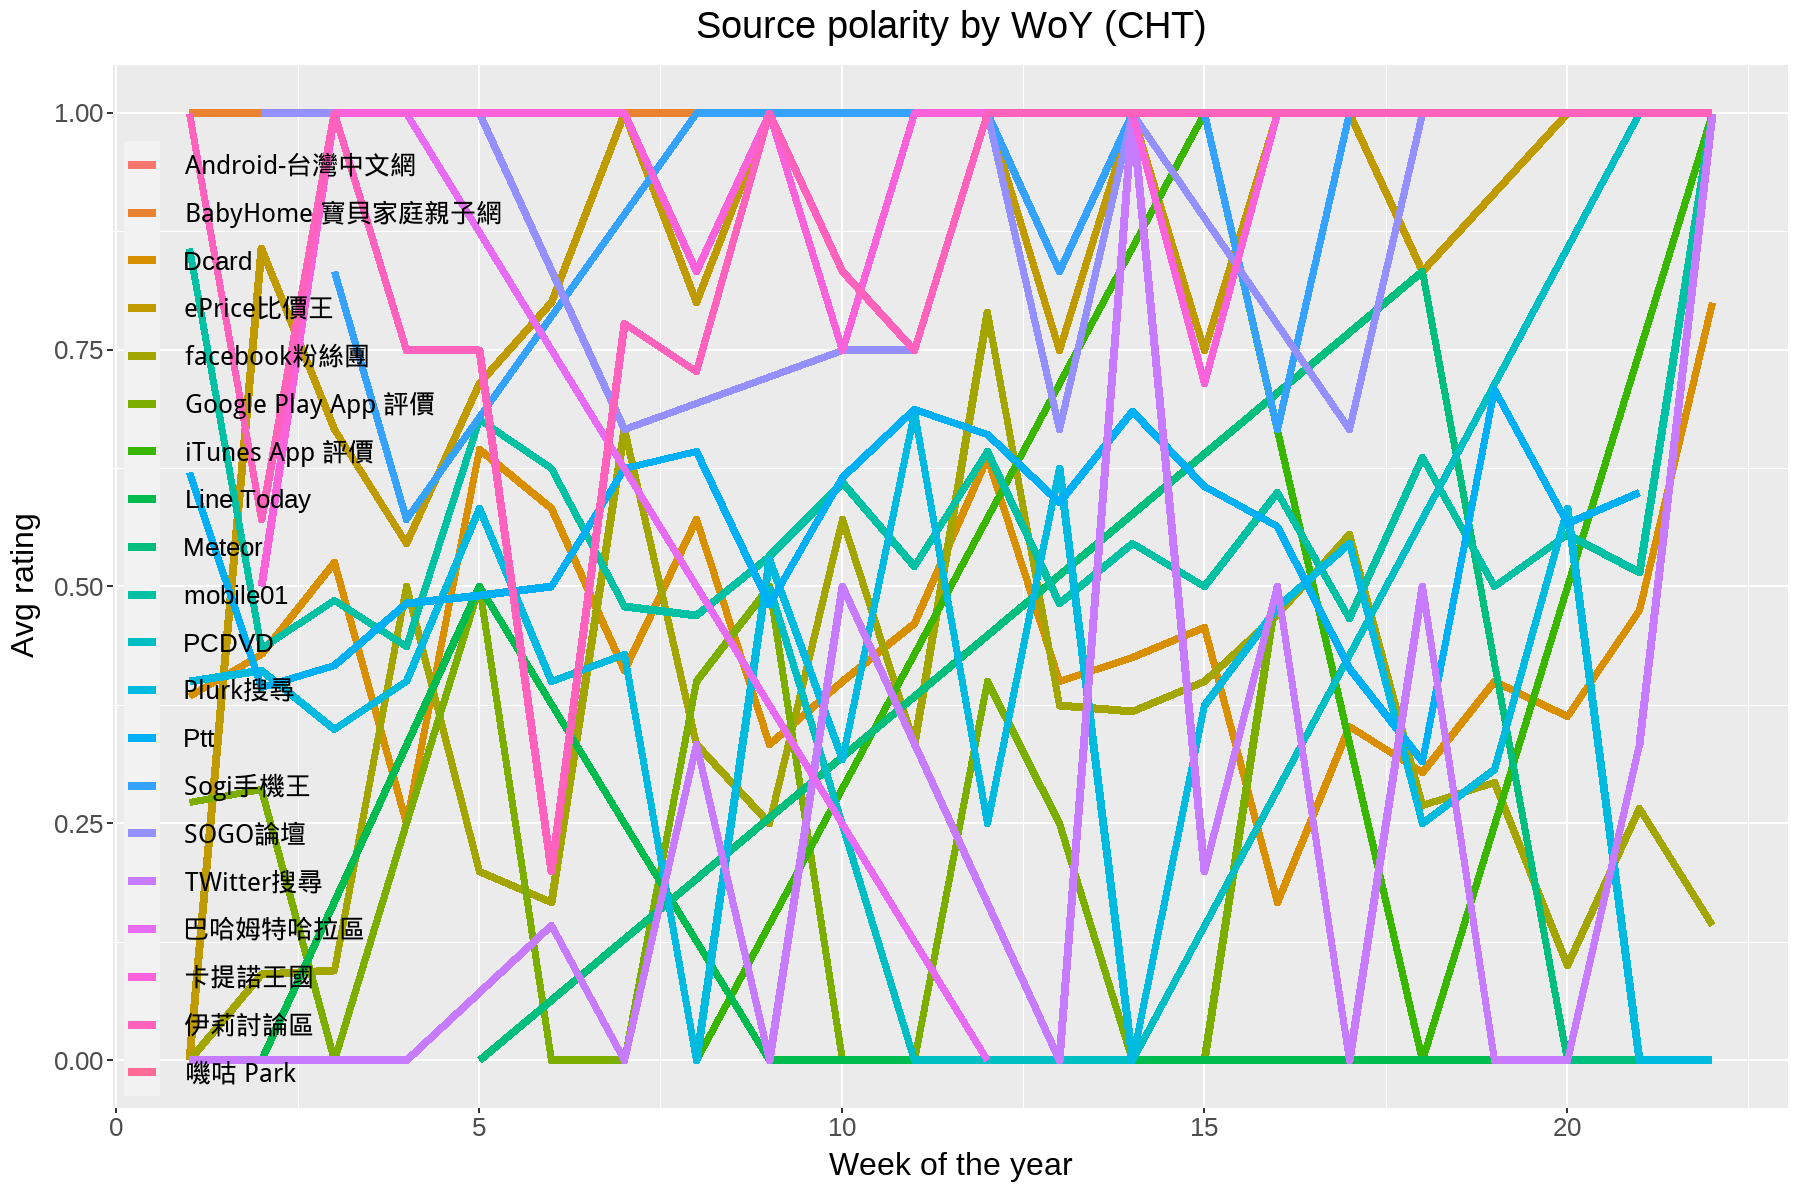

In [15]:
popt(12,8,150)
ggplot(data = cht_data %>%
               group_by(source, woy) %>% 
               summarise(mean=mean(rating), .groups="drop"),
      aes(x=woy, y=mean, color=source)) + 
geom_line(lwd=2) + 
scale_y_continuous(limits=c(0,1)) +
labs(y="Avg rating", x="Week of the year", title="Source polarity by WoY (CHT)") + 
theme(text=element_text(size=24),
    plot.title=element_text(hjust=0.5),
    legend.position=c(0, 0), 
    legend.justification=c("left", "bottom"),
    legend.background=element_rect(fill="transparent"),
    legend.title=element_blank())

In [16]:
m0 = bam(rating~s(ts) + s(source, bs='re'), data=cht_data, family="binomial", method="ML")

In [17]:
summary(m0)


Family: binomial 
Link function: logit 

Formula:
rating ~ s(ts) + s(source, bs = "re")

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   0.3138     0.3067   1.023    0.306

Approximate significance of smooth terms:
             edf Ref.df Chi.sq p-value    
s(ts)      2.964  3.693   19.8 0.00041 ***
s(source) 14.996 19.000  265.4 < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.101   Deviance explained = 8.33%
-ML = 4734.9  Scale est. = 1         n = 3333

In [18]:
m1 = bam(rating~category+s(ts, by=category)+s(source, bs='re'), data=cht_data, family="binomial", method="ML")

In [19]:
summary(m1)


Family: binomial 
Link function: logit 

Formula:
rating ~ category + s(ts, by = category) + s(source, bs = "re")

Parametric coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.17702    0.32288   0.548 0.583526    
category加值服務  0.44674    0.12436   3.592 0.000328 ***
category資費方案  0.20988    0.08614   2.436 0.014832 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                          edf Ref.df  Chi.sq p-value    
s(ts):category通訊品質  1.001  1.001   0.170   0.681    
s(ts):category加值服務  6.166  7.257  49.578  <2e-16 ***
s(ts):category資費方案  1.001  1.001   1.039   0.308    
s(source)              15.159 19.000 250.961  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.119   Deviance explained = 9.85%
-ML = 4741.8  Scale est. = 1         n = 3333

In [20]:
ts_ticks = cht_data %>% group_by(woy) %>% summarise(ts=min(ts))

Summary:
	* category : factor; set to the value(s): 加值服務, 通訊品質, 資費方案. 
	* ts : numeric predictor; with 30 values ranging from 286189.000000 to 13075922.000000. 
	* source : factor; set to the value(s): Ptt. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(source)
 


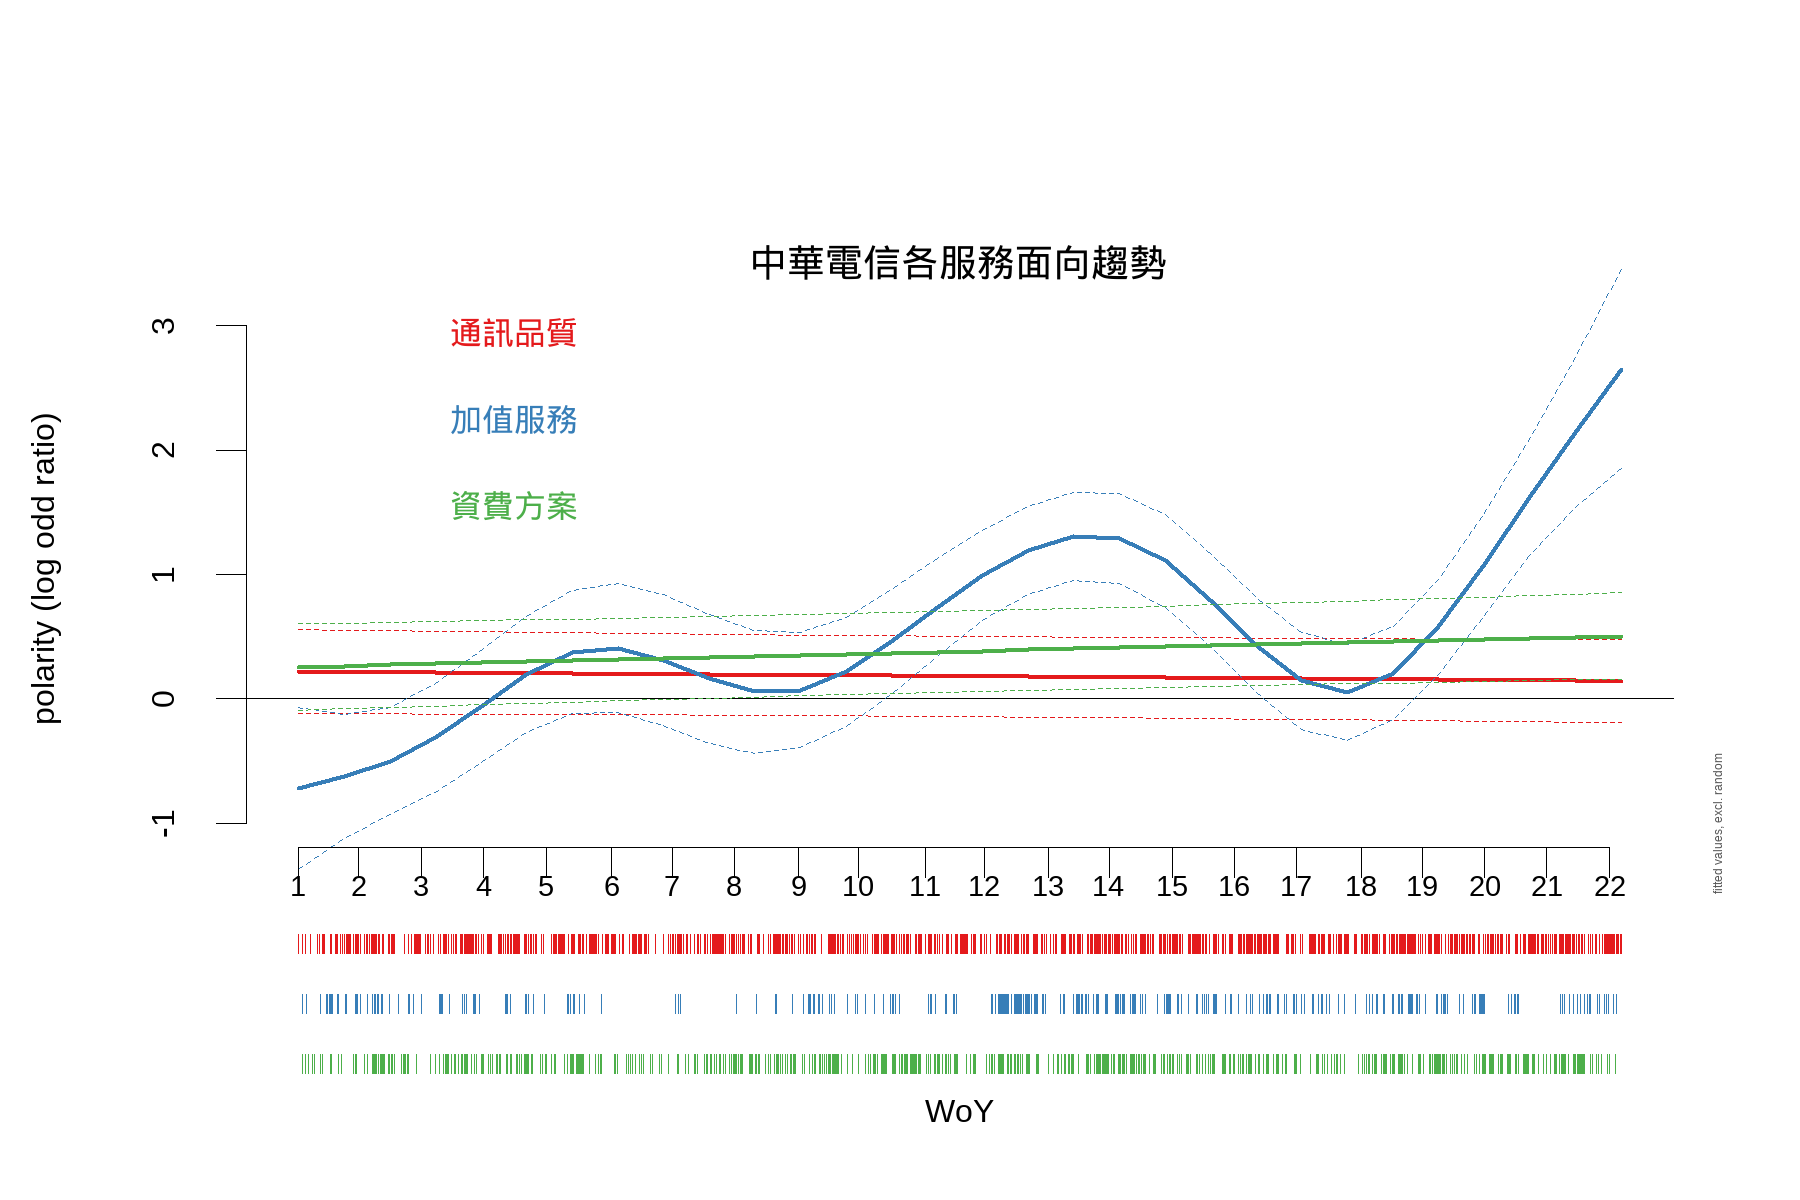

In [21]:
par(cex=2)
pal = brewer.pal(8, "Set1")
m1_plot.1 = plot_smooth(m1, view='ts', plot_all="category", col=brewer.pal(8, "Set1"), 
            lwd=3, legend_plot_all="topleft", shade=F,             
            ylab="polarity (log odd ratio)", xaxt='n', xlab="WoY", se=1, rug=F)
title("中華電信各服務面向趨勢", line=-.5)
axis(1, ts_ticks$ts, ts_ticks$woy, labels=ts_ticks$woy, cex.axis=0.9, pos=-1.2, mgp=c(2, 0, .5))
rug(cht_data$ts[cht_data$category=="通訊品質"], side=1, col=pal[1], line=1)
rug(cht_data$ts[cht_data$category=="加值服務"], side=1, col=pal[2], line=2)
rug(cht_data$ts[cht_data$category=="資費方案"], side=1, col=pal[3], line=3)

In [23]:
m1.src = get_modelterm(m1, select=4)
m1.src = m1.src[order(m1.src$fit),]
m1.src$ul = m1.src$fit+m1.src$se.fit
m1.src$ll = m1.src$fit-m1.src$se.fit
m1.src$source = factor(m1.src$source, levels=m1.src$source,ordered=T)

Summary:
	* source : factor with 20 values; set to the value(s): Android-台灣中文網, BabyHome 寶貝家庭親子網, Dcard, ePrice比價王, facebook粉絲團, Google Play App 評價, iTunes App 評價, Line Today, Meteor, mobile01, ... 


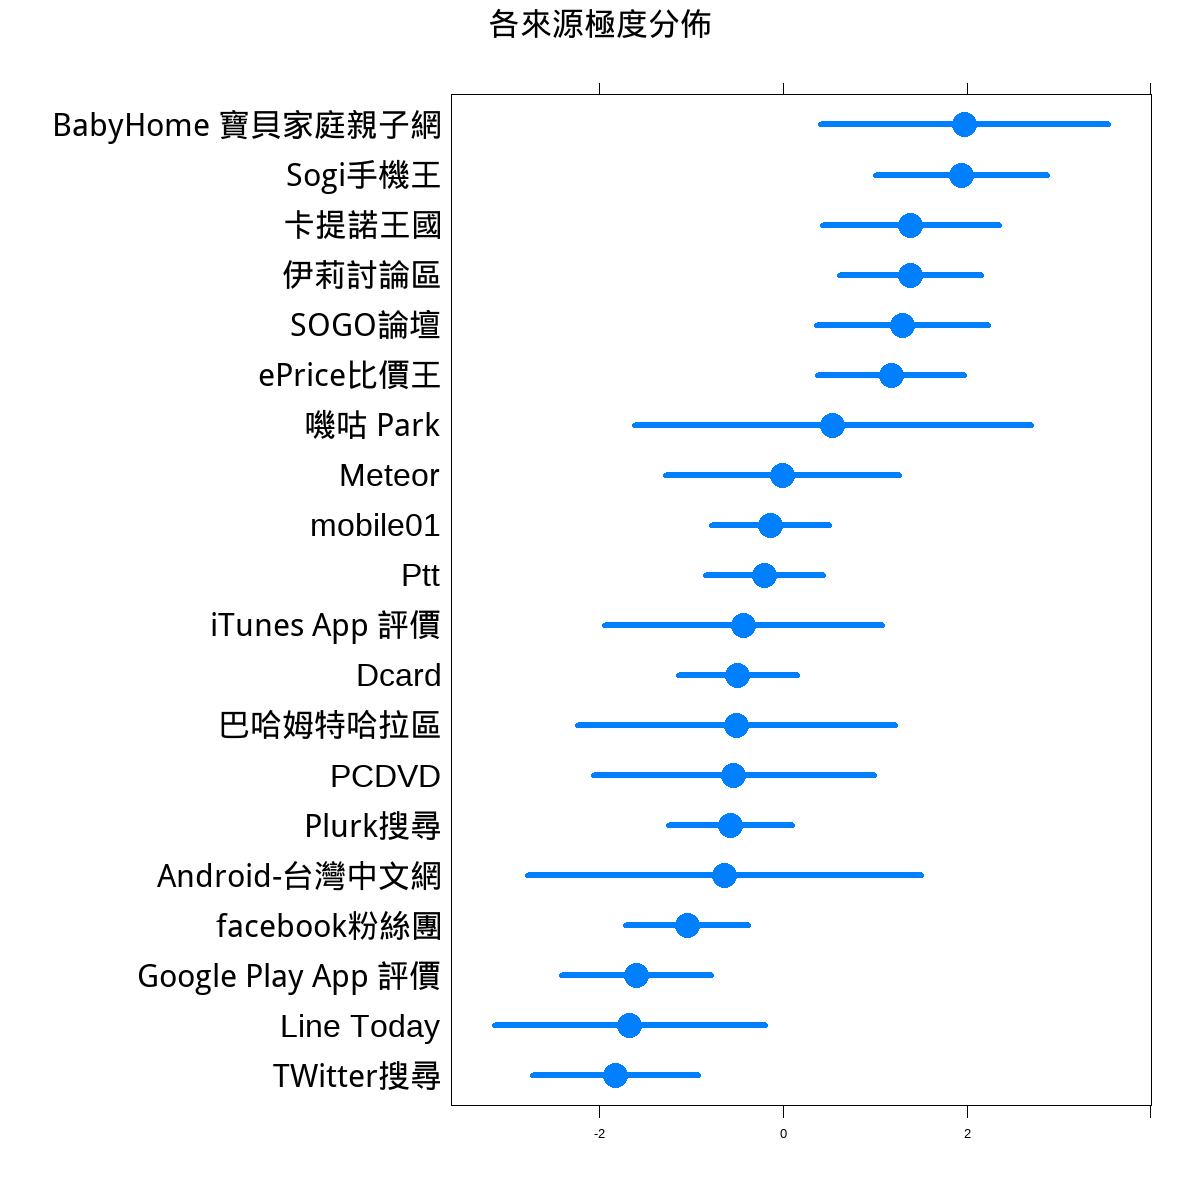

In [26]:
popt(8, 8, 150)
segplot(source~ll+ul, data=m1.src, centers=fit, draw.bands=F, 
        main=list("各來源極度分佈", cex=2),
        lwd=4, cex=2,         
        scales=list(y=list(cex=2)))